<a href="https://colab.research.google.com/github/sakarla/Machine-Learning-for-Architecs/blob/main/week%204_Data%20Visualization/Code/Week4_text_preprocessing_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text pre-processing and visulization:**
In this section, we will implement several preprocessing techniques on the text data collected previously. The objective of this part is to familiarize you with essential steps that enhance data clarity, ensuring it is well-prepared for the machine learning process.


*    Learn text preprocessing
*    Visualization
  *   Bar chart
  *   Cloud of words
*  Bag-of-words
*  Word2Vec





Let's get started!

# **1. Text preprocessing**

## Step 1: Mount Google Drive

To start, we will link this notebook to your Google Drive. Make sure you are logged in on your Google account

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Step 2: Import Libraries

Make sure to install any libraries that are not already installed by using `!pip install library_name`.
We import these libraries to help clean, process, and analyze text. For example, re helps with removing punctuation, and nltk helps break sentences into words and remove common ones like ‘the’, ‘is’, or ‘and’.

In [28]:
import pandas as pd  #pandas is a powerful library for data manipulation and analysis.
import numpy as np  #numpy is a library for numerical computing.
import re   #re stands for regular expressions, which are used for string matching and manipulation.
import nltk  #nltk is a library for natural language processing (NLP).
from nltk.corpus import stopwords   #stopwords are common words like "and", "the", "is", etc., that are usually removed from text data because they don't carry significant meaning.
from sklearn.feature_extraction.text import CountVectorizer   #CountVectorizer is a tool that converts text data into a matrix of token counts. It's a way to prepare text data for machine learning.
import os
import json

In [29]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Step 3: Load and Combine JSON Files

Purpose: Read all .json files from a folder and combine their content.

You can change the directory to where your files are! (*```folder_path = '/content/drive/MyDrive/Colab Notebooks/text'```*).

In [20]:
# Set the folder path to your JSON files
folder_path = '/content/drive/MyDrive/Colab Notebooks/ML_for_Architects/collecting data/myproject/text'

# Check if the folder exists
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"❌ Folder not found: {folder_path}")

# List all .json files in the folder
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

combined_data = []

# Read and combine data from each file
for filename in json_files:
    file_path = os.path.join(folder_path, filename)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            if isinstance(data, list):
                combined_data.extend(data)
            else:
                combined_data.append(data)
    except json.JSONDecodeError:
        print(f"⚠️ JSON decode error in file: {filename} — trying line-by-line")
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                try:
                    entry = json.loads(line)
                    combined_data.append(entry)
                except json.JSONDecodeError:
                    print(f"⚠️ Skipping invalid line in {filename}: {line.strip()}")


⚠️ JSON decode error in file: output_text.json — trying line-by-line
⚠️ Skipping invalid line in output_text.json: [
⚠️ Skipping invalid line in output_text.json: ],[
⚠️ Skipping invalid line in output_text.json: ]


 ## Step 4: Save the Combined JSON

In [21]:
# Save to the same folder as a new JSON file
output_file = os.path.join(folder_path, 'combined_data.json')

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Save the combined data
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(combined_data, f, indent=2)

print(f"✅ Combined data saved to: {output_file}")


✅ Combined data saved to: /content/drive/MyDrive/Colab Notebooks/ML_for_Architects/collecting data/myproject/text/combined_data.json


## Step 5: Load text File

Purpose: Open the combined_data.json file that we just created and prepare it for processing.

Assuming you have a JSON file called **combined_data.json**, you can read it as follows:

In [22]:
# Path to the saved combined JSON file
json_file = os.path.join(folder_path, 'combined_data.json')

# Load the JSON data
with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

##  Step 6: Extract Text Content

Purpose: Extract the "content" field from each dictionary inside the JSON list.

Each JSON item contains a field called content. We extract all the content and store it in a list called text_data so we can clean and process it in the next step

In [23]:
# Initialize an empty list to store all text
text_data = []

# Loop through each item in the JSON and extract 'content'
for item in data:
    if 'content' in item:
        # If 'content' is a list of strings, join it into a single string
        joined_text = ' '.join(item['content']) if isinstance(item['content'], list) else item['content']
        text_data.append(joined_text)


Now, **text_data** contains a list of sentences from your text file.

 Before preprocessing, it's essential to understand your data. You can do this by checking the first few rows of your Data and getting some basic statistics.

In [24]:
# Show first 3 samples
print("📌 Sample texts:")
print(text_data[:3])

# Summary statistics
print(f"\n✅ Total number of text entries: {len(text_data)}")


📌 Sample texts:
["\nProjects\n \nImages\n \nProducts\n \nFolders\n \nAD Plus\n \nBenefits\n \nArchive\n \nContent\n \nMaps\n \nAudio\n Located outside of  ’s train station, this soaring 55-meter beacon building will establish itself as an entrance to the city. The Semaphore is the product of   architects   + Ateliers Laporte and holds a strong identity and concept in creating a dynamic, engaging environment while blending harmoniously into its surrounding environment. The building is broken into three distinct volumes: the pedestal, the attic, and the emergence. The pedestal engages the public in neighborhood activities, bringing programmatic diversity to the neighborhood. It houses shops, offices, a child care center, as well as other amenities. Additionally, it also features a series of gardens\xa0providing both the city and neighborhood with a veritable eco-system.\xa0 The attic lies above the pedestal and holds 27   across three stories, subtly echoing the attics of the surrounding

## Step 7: Text Cleaning

 Purpose: Prepare the text for analysis by removing noise and standardizing the format.

We’ll apply 4 cleaning steps:

* Lowercasing

*  Removing special characters and numbers

*  Tokenization

*  Stopword removal

### **Lowercasing**: Convert all text to lowercase to ensure consistency.

We convert each sentence in the text data to lowercase.
This helps in maintaining uniformity, as 'Python' and 'python' will be considered the same word.

This helps us treat ‘The’ and ‘the’ as the same word.

In [26]:
# Convert all text to lowercase
text_data = [sentence.lower() for sentence in text_data]

# Preview cleaned text
print(" Lowercased sample:")
print(text_data[:3])


 Lowercased sample:
["\nprojects\n \nimages\n \nproducts\n \nfolders\n \nad plus\n \nbenefits\n \narchive\n \ncontent\n \nmaps\n \naudio\n located outside of  ’s train station, this soaring 55-meter beacon building will establish itself as an entrance to the city. the semaphore is the product of   architects   + ateliers laporte and holds a strong identity and concept in creating a dynamic, engaging environment while blending harmoniously into its surrounding environment. the building is broken into three distinct volumes: the pedestal, the attic, and the emergence. the pedestal engages the public in neighborhood activities, bringing programmatic diversity to the neighborhood. it houses shops, offices, a child care center, as well as other amenities. additionally, it also features a series of gardens\xa0providing both the city and neighborhood with a veritable eco-system.\xa0 the attic lies above the pedestal and holds 27   across three stories, subtly echoing the attics of the surroun

### **Removing Special Characters and Numbers:** Remove punctuation, special characters, and numbers using regular expressions.

`sentence.replace('\n', ' ')`: Within each sentence, this part of the code uses the replace method to replace all occurrences of the newline character ('\n') with nothing('').

`r'[^a-zA-Z\s]':` This regular expression pattern matches any character that is not an uppercase or lowercase alphabet letter (a-zA-Z) and not a whitespace character (\s).

In [27]:
# Remove punctuation, numbers, and special characters
text_data = [re.sub(r'[^a-zA-Z\s]', '', sentence.replace('\n', ' ')) for sentence in text_data]

# Preview cleaned text
print("📌 Cleaned sample:")
print(text_data[:3])


📌 Cleaned sample:
[' projects   images   products   folders   ad plus   benefits   archive   content   maps   audio  located outside of  s train station this soaring meter beacon building will establish itself as an entrance to the city the semaphore is the product of   architects    ateliers laporte and holds a strong identity and concept in creating a dynamic engaging environment while blending harmoniously into its surrounding environment the building is broken into three distinct volumes the pedestal the attic and the emergence the pedestal engages the public in neighborhood activities bringing programmatic diversity to the neighborhood it houses shops offices a child care center as well as other amenities additionally it also features a series of gardens\xa0providing both the city and neighborhood with a veritable ecosystem\xa0 the attic lies above the pedestal and holds    across three stories subtly echoing the attics of the surrounding buildings  the final component is that of 

### **Tokenization:** Split text into individual words or tokens.

In [32]:
# Clean download of punkt to avoid hidden corrupted cache
nltk.download('punkt')
nltk.download('punkt_tab')  # Extra (sometimes fixes the edge case)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [33]:

# Split sentences into words
tokenized_data = [nltk.word_tokenize(sentence) for sentence in text_data]

# Preview tokenized output
print("📌 Tokenized sample:")
print(tokenized_data[:3])



📌 Tokenized sample:
[['projects', 'images', 'products', 'folders', 'ad', 'plus', 'benefits', 'archive', 'content', 'maps', 'audio', 'located', 'outside', 'of', 's', 'train', 'station', 'this', 'soaring', 'meter', 'beacon', 'building', 'will', 'establish', 'itself', 'as', 'an', 'entrance', 'to', 'the', 'city', 'the', 'semaphore', 'is', 'the', 'product', 'of', 'architects', 'ateliers', 'laporte', 'and', 'holds', 'a', 'strong', 'identity', 'and', 'concept', 'in', 'creating', 'a', 'dynamic', 'engaging', 'environment', 'while', 'blending', 'harmoniously', 'into', 'its', 'surrounding', 'environment', 'the', 'building', 'is', 'broken', 'into', 'three', 'distinct', 'volumes', 'the', 'pedestal', 'the', 'attic', 'and', 'the', 'emergence', 'the', 'pedestal', 'engages', 'the', 'public', 'in', 'neighborhood', 'activities', 'bringing', 'programmatic', 'diversity', 'to', 'the', 'neighborhood', 'it', 'houses', 'shops', 'offices', 'a', 'child', 'care', 'center', 'as', 'well', 'as', 'other', 'amenities'

### **Stopword Removal:** Remove common stopwords (e.g., "the", "and", "is") to reduce noise.

This step helps in reducing the noise in the data, allowing us to focus on more meaningful words.

In [34]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove common stopwords
tokens_no_stopwords = [
    [word for word in sentence if word not in stop_words]
    for sentence in tokenized_data
]

# Preview after stopword removal
print("📌 Without stopwords:")
print(tokens_no_stopwords[:3])

📌 Without stopwords:
[['projects', 'images', 'products', 'folders', 'ad', 'plus', 'benefits', 'archive', 'content', 'maps', 'audio', 'located', 'outside', 'train', 'station', 'soaring', 'meter', 'beacon', 'building', 'establish', 'entrance', 'city', 'semaphore', 'product', 'architects', 'ateliers', 'laporte', 'holds', 'strong', 'identity', 'concept', 'creating', 'dynamic', 'engaging', 'environment', 'blending', 'harmoniously', 'surrounding', 'environment', 'building', 'broken', 'three', 'distinct', 'volumes', 'pedestal', 'attic', 'emergence', 'pedestal', 'engages', 'public', 'neighborhood', 'activities', 'bringing', 'programmatic', 'diversity', 'neighborhood', 'houses', 'shops', 'offices', 'child', 'care', 'center', 'well', 'amenities', 'additionally', 'also', 'features', 'series', 'gardens', 'providing', 'city', 'neighborhood', 'veritable', 'ecosystem', 'attic', 'lies', 'pedestal', 'holds', 'across', 'three', 'stories', 'subtly', 'echoing', 'attics', 'surrounding', 'buildings', 'final

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **2. Visualization**:
**Goal**: Explore the most common words using:
*  Bar Chart (Top N words)

*  Word Cloud (most frequent terms in a visual format)

We're using the list *tokens_no_stopwords* that we cleaned earlier.

## **2.1 bar chart**

**Step 2.1:Import Visualization Libraries**

Import the necessary libraries:

Matplotlib lets us create plots. Counter counts how often each word appears. WordCloud turns words into a nice graphic.

In [35]:
import pandas as pd  #Used for data manipulation.
import matplotlib.pyplot as plt               # For plotting charts
from collections import Counter               # For counting word frequency
from wordcloud import WordCloud               # For generating word clouds


**Step 2.2**: Flatten Tokens and Count Frequencies

We’re flattening our list of word lists and then counting each word.



In [36]:
# Combine all lists of words into one big list
all_words = [word for sentence in tokens_no_stopwords for word in sentence]

# Count the frequency of each word
word_freq = Counter(all_words)

# Preview top 10 most common words
print("📌 Most common words:", word_freq.most_common(10))


📌 Most common words: [('building', 78), ('hospital', 68), ('spaces', 60), ('design', 58), ('environment', 48), ('space', 48), ('health', 44), ('architecture', 36), ('patients', 34), ('creating', 32)]


**Step 2.3**: Plot Bar Chart of Top N Words

Visualize the word frequencies using a bar chart:

This code will count the frequencies of words in the preprocessed text data and create a bar chart to visualize the top N most common words. You can adjust the value of N to display more or fewer words in the chart.

This chart helps us see which words are most dominant in the dataset.

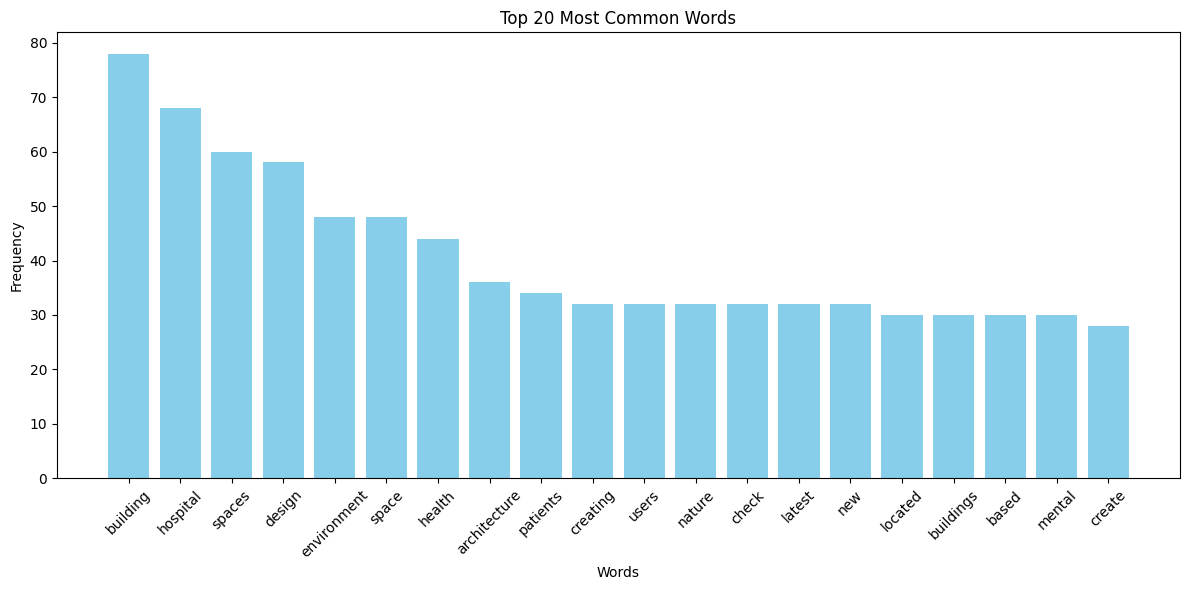

In [37]:
# Top N most frequent words
N = 20
most_common_words = word_freq.most_common(N)
words, frequencies = zip(*most_common_words)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title(f"Top {N} Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **2.2 Create a Word Cloud**



**Step 1:** Combine Preprocessed Text

Combine all the preprocessed sentences into a single text:

In [38]:
combined_text = " ".join([" ".join(sentence) for sentence in tokens_no_stopwords]) #We join all the words from the preprocessed sentences into a single string.
print(combined_text)

projects images products folders ad plus benefits archive content maps audio located outside train station soaring meter beacon building establish entrance city semaphore product architects ateliers laporte holds strong identity concept creating dynamic engaging environment blending harmoniously surrounding environment building broken three distinct volumes pedestal attic emergence pedestal engages public neighborhood activities bringing programmatic diversity neighborhood houses shops offices child care center well amenities additionally also features series gardens providing city neighborhood veritable ecosystem attic lies pedestal holds across three stories subtly echoing attics surrounding buildings final component emergence comprised three volumes varying shapes sizes housing floors apartments volumes gracefully layered top one another shifting horizontal axis create elegant silhouette marking skyline saintmalo apartment spacious bright visual connections city large terraces loggi

**Step 2:** Generate the Word Cloud

Generate the word cloud from the combined text:

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)  #Sets the width of the word cloud image to 800 pixels. This controls how wide the image will be.


**Step 3:** Display the Word Cloud
A word cloud is a quick visual summary. Larger words appeared more often.

Display the word cloud using matplotlib:

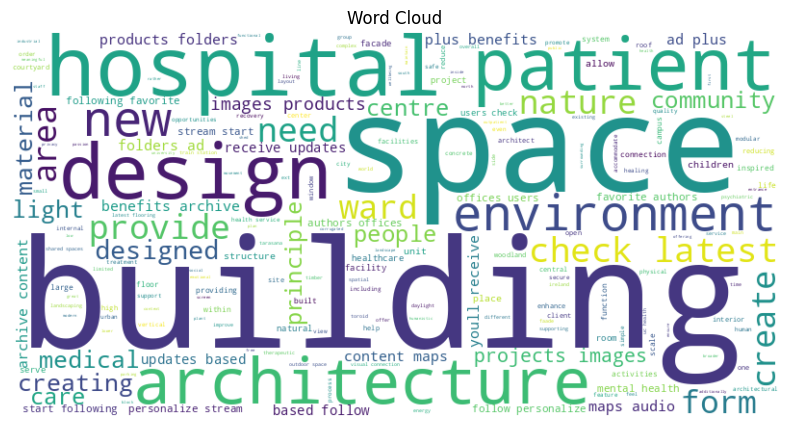

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()


# **3. Bag- of-words**

**Goal:** Convert your cleaned text into numerical features using the Bag-of-Words (BoW) model.


What is BoW?

Each sentence is turned into a vector that shows how often each word appears.

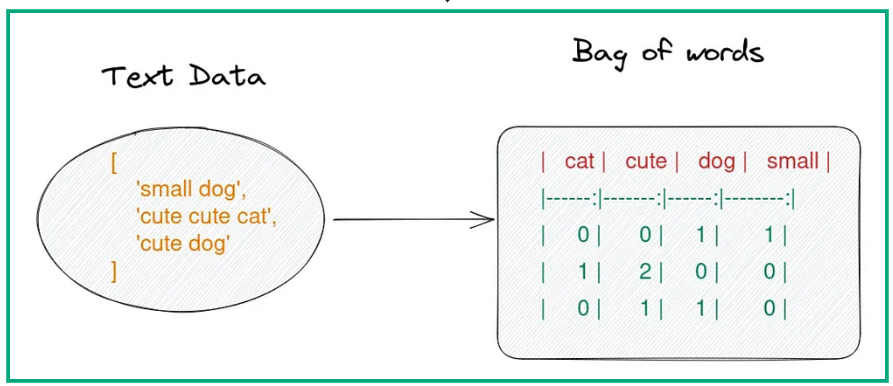

In [45]:
from sklearn.feature_extraction.text import CountVectorizer  #CountVectorizer is a class from the sklearn (scikit-learn) library that converts a collection of text documents to a matrix of token counts.

# Flatten the token list into strings for vectorization
# Join the tokens back into full cleaned sentences
cleaned_sentences = [" ".join(sentence) for sentence in tokens_no_stopwords]

# Initialize BoW model
vectorizer = CountVectorizer()

# Fit and transform the cleaned text
bow_matrix = vectorizer.fit_transform(cleaned_sentences)

# Show dimensions
print("✅ BoW Matrix shape:", bow_matrix.shape)

# Show the vocabulary (first 10 words)
print("📌 Vocabulary sample:")
print(list(vectorizer.vocabulary_.keys())[:10])

✅ BoW Matrix shape: (24, 1727)
📌 Vocabulary sample:
['projects', 'images', 'products', 'folders', 'ad', 'plus', 'benefits', 'archive', 'content', 'maps']


The bow_model variable is a sparse matrix that contains the frequency of each word in the vocabulary for each text document in the *text_data list*. You can access the vocabulary and the mapping from words to indices using the *vocabulary_ attribute* of the *CountVectorizer* object.

Each row represents a sentence. Each column represents a word. The number in the cell shows how often the word appeared in that sentence

In [46]:
# Turn into a DataFrame for better visibility
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Preview the BoW matrix
bow_df.head()


,able,absconding,abundant,abuse,access,accessed,accessible,accommodate,accommodates,accommodating,...,yang,yard,yet,yin,yoga,york,yorkshire,youll,young,zones
0,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## **Alternatives to a Bag-of-Words in Python**

When representing text data in natural language processing (NLP) tasks, several alternatives to the bag-of-words model can be more effective:

### 1. N-grams
- **Definition**: Contiguous sequences of n words in a text document.
- **Usefulness**: Captures the relationship between adjacent words, helpful for understanding word order and meaning.

### 2. Word Embeddings
- **Definition**: Dense, low-dimensional representations of words.
- **Usefulness**: Captures the semantic relationships between words, representing their meaning and relationships.

### 3. Part-of-Speech Tags
- **Definition**: Identifies the part of speech (e.g., noun, verb, adjective) of each word.
- **Usefulness**: Captures the syntactic structure and relationships between words.

### 4. Named Entity Recognition (NER)
- **Definition**: Identifies and classifies named entities (e.g., people, organizations, locations) in a text document.
- **Usefulness**: Extracts structured information from unstructured text, identifying important entities.

### 5. Syntactic Parsing
- **Definition**: Analyzes the structure of a sentence and determines relationships between words.
- **Usefulness**: Captures the syntactic structure and relationships between words in a text document.


# **4. Word2Vec**
**Goal:** Convert each word into a vector of real numbers that captures its meaning, using Word2Vec

Unlike Bag-of-Words (which only counts words), Word2Vec captures semantic similarity — e.g., "king" and "queen" will be closer in vector space than "king" and "banana".

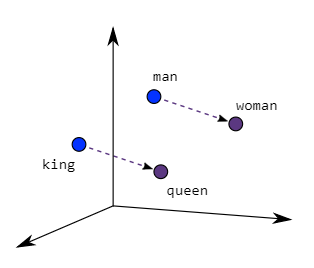

step 4.1: Install and Import Gensim

In [48]:
# Install gensim if not already installed
!pip install gensim

from gensim.models import Word2Vec


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from gensim.models import Word2Vec
# Trains a Word2Vec model with the given parameters.
word2vec_model = Word2Vec(tokens_no_stopwords, vector_size=100, window=5, min_count=1, workers=4)  #Sets the size of the word vectors to 100 dimensions.
                              #window=5: Uses a context window of 5 words.Ignores all words with a total frequency lower than this.
                              #workers=4: Uses 4 CPU cores for training.

# Get the vector for a word
word_vector = word2vec_model.wv['house']  # Retrieves the vector representation of the word 'house'.
print("Word vector for 'house':", word_vector)

# Check similarity between two words
similarity = word2vec_model.wv.similarity('house', 'home')  #Computes the similarity between the words 'house' and 'home'.
print("Similarity between 'house' and 'home':", similarity)   #A higher score (closer to 1) would mean that the words are more similar. A lower score (closer to 0) means they are less similar.

In [ ]:
# Find and display the top 10 words similar to 'house'
similar_words = word2vec_model.wv.most_similar('house', topn=10)
print("Top 10 words similar to 'house':")
for word, score in similar_words:
    print(f"{word}: {score}")

# Task
Review and improve the provided Python code for text analysis, focusing on data loading, text preprocessing, visualization, Bag-of-Words, and Word2Vec implementations. Suggest refactoring and best practices where applicable.

## Review data loading and combining

### Subtask:
Examine the code for mounting Google Drive and combining JSON files to see if there are any potential improvements in efficiency or error handling.


**Reasoning**:
Reviewing the code for mounting Google Drive and combining JSON files, the current error handling for JSON decoding attempts to read line by line if the initial load fails. This is a good step, but it could be more robust. Additionally, while the current approach works for combining files, for very large datasets, alternative methods might be more memory efficient. I will add comments to the existing code to highlight areas for potential improvement and discuss alternative approaches in a markdown cell.

